# Initial Setup

In [2]:
import pandas as pd
df = pd.read_csv("../data/processed/preprocessed_data.csv", low_memory=False)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

SAVE_PATH = "../../visualizations/model_2/pre_eda"

In [3]:
def _clean_sofifa_data( df):
    df.columns = df.columns.str.replace(" / ", "_").str.replace(" & ", "_").str.replace(" ", "_")

    df['height(cm)'] = df["height"].str.split("cm").str[0].astype(int)
    df['weight(kg)'] = df["weight"].str.split("kg").str[0].astype(int) 

    df['foot'] = df['foot'].map({"Left": 1, "Right": 2})

def extract_team(df):
    df[['start_part', 'end_year']] = df['team_contract'].str.split(' ~ ', expand=True)
    df[['team', 'start_year']] = df['start_part'].str.extract(r'([A-Za-z]+)(\d{4})')

def parse_monetary_value(row): 
    row = row.split('€')[1]
    if "M" in row:
        value = float(row.replace("M", "")) * 1_000_000
    elif "K" in row:
        value = float(row.replace("K", "")) * 1_000
    else:
        value = float(row)

    return value

def extract_primary_position(row):
    if "," in row:
        row = row.split(",")[0]
    
    return row.strip()


_clean_sofifa_data(df)
extract_team(df)
df['value(€)'] = df['value'].apply(parse_monetary_value)
df['wage(€)'] = df['wage'].apply(parse_monetary_value)

df['release_clause(€)'] = df['release_clause'].apply(parse_monetary_value)
df["Tackles_Tkl%"] = df["Tackles_TklW"] / df["Tackles_Tkl"]
df["pos"] = df["pos"].apply(extract_primary_position)

In [4]:
df

,player,age_x,overall_rating,potential,team_contract,id,height,weight,foot,best_overall,best_position,growth,joined,loan_date_end,value,wage,release_clause,total_attacking,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,fk_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,attack_position,vision,penalties,composure,total_defending,defensive_awareness,standing_tackle,gk_diving,total_stats,base_stats,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,international_reputation,body_type,real_face,pace_diving,shooting_handling,passing_kicking,dribbling_reflexes,defending_pace,physical_positioning,traits,traits.1,playstyles,playstyles_+,number_of_playstyles,acceleration_type,club_position,club_kit_number,season,season_code,league,team,nation,pos,age_y,born,Playing_Time_MP,Playing_Time_Starts,Playing_Time_Min,Playing_Time_90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,Performance_CrdR,Expected_xG,Expected_npxG,Expected_xAG,Expected_npxG+xAG,Progression_PrgC,Progression_PrgP,Progression_PrgR,Per_90_Minutes_Gls,Per_90_Minutes_Ast,Per_90_Minutes_G+A,Per_90_Minutes_G-PK,Per_90_Minutes_G+A-PK,Per_90_Minutes_xG,Per_90_Minutes_xAG,Per_90_Minutes_xG+xAG,Per_90_Minutes_npxG,Per_90_Minutes_npxG+xAG,90s,Standard_Gls,Standard_Sh,Standard_SoT,Standard_SoT%,Standard_Sh/90,Standard_SoT/90,Standard_G/Sh,Standard_G/SoT,Standard_Dist,Standard_FK,Standard_PK,Standard_PKatt,Expected_npxG/Sh,Expected_G-xG,Expected_np:G-xG,Total_Cmp,Total_Att,Total_Cmp%,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Ast,xAG,Expected_xA,Expected_A-xAG,KP,1/3,PPA,CrsPA,PrgP,Att,Pass_Types_Live,Pass_Types_Dead,Pass_Types_FK,Pass_Types_TB,Pass_Types_Sw,Pass_Types_Crs,Pass_Types_TI,Pass_Types_CK,Corner_Kicks_In,Corner_Kicks_Out,Corner_Kicks_Str,Outcomes_Cmp,Outcomes_Off,Outcomes_Blocks,SCA_SCA,SCA_SCA90,SCA_Types_PassLive,SCA_Types_PassDead,SCA_Types_TO,SCA_Types_Sh,SCA_Types_Fld,SCA_Types_Def,GCA_GCA,GCA_GCA90,GCA_Types_PassLive,GCA_Types_PassDead,GCA_Types_TO,GCA_Types_Sh,GCA_Types_Fld,GCA_Types_Def,Tackles_Tkl,Tackles_TklW,Tackles_Def_3rd,Tackles_Mid_3rd,Tackles_Att_3rd,Challenges_Tkl,Challenges_Att,Challenges_Tkl%,Challenges_Lost,Blocks_Blocks,Blocks_Sh,Blocks_Pass,Int,Tkl+Int,Clr,Err,Touches_Touches,Touches_Def_Pen,Touches_Def_3rd,Touches_Mid_3rd,Touches_Att_3rd,Touches_Att_Pen,Touches_Live,Take-Ons_Att,Take-Ons_Succ,Take-Ons_Succ%,Take-Ons_Tkld,Take-Ons_Tkld%,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR,Playing_Time_Mn/MP,Playing_Time_Min%,Starts_Starts,Starts_Mn/Start,Starts_Compl,Subs_Subs,Subs_Mn/Sub,Subs_unSub,Team_Success_PPM,Team_Success_onG,Team_Success_onGA,Team_Success_+/-,Team_Success_+/-90,Team_Success_On-Off,Team_Success_(xG)_onxG,Team_Success_(xG)_onxGA,Team_Success_(xG)_xG+/-,Team_Success_(xG)_xG+/-90,Team_Success_(xG)_On-Off,Performance_2CrdY,Performance_Fls,Performance_Fld,Performance_Off,Performance_Crs,Performance_Int,Performance_TklW,Performance_PKwon,Performance_PKcon,Performance_OG,Performance_Recov,Aerial_Duels_Won,Aerial_Duels_Lost,Aerial_Duels_Won%,height(cm),weight(kg),start_part,end_year,start_year,value(€),wage(€),release_clause(€),Tackles_Tkl%
0,m. salah,32,91,91,Liverpool2017 ~ 2027,209331,"175cm 5'9""",72kg 159lbs,1,91,RM,0,"Jul 1, 2017",NaN,€104M,€350K,€192.4M,411,86,95,59,88,83,418,90,88,69,81,90,452,89,89,89,94,91,409,83,79,88,75,84,387,63,55,93,89,87,93,122,38,43,14,2261,475,3,4,NaN,NaN,5,Unique,Yes,89,89,86,90,45,76,NaN,NaN,Chip shotPinged passWhipped crossTechnicalFirs...,Finesse shot +,7,Mostly explosive,RM,11,2025,250044,ENG-Premier League,Liverpool,EGY,FW,32.0,1992.0,38,38,3371,37.5,29,18,47,20,9,9,1,0

# Missing Values Analysis

## Missing info dataframe

In [5]:
# Calculate missing values percentage for each column
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_info = missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(f"Columns with missing values: {len(missing_info)} out of {len(df.columns)}")
print(f"\nTop 20 columns with most missing values:")

missing_info

Columns with missing values: 157 out of 262

Top 20 columns with most missing values:


,Column,Missing_Count,Missing_Percentage
playstyles_+,playstyles_+,13894,99.16
traits.1,traits.1,13112,93.58
loan_date_end,loan_date_end,12456,88.90
playstyles,playstyles,11457,81.77
acceleration_type,acceleration_type,10505,74.98
...,...,...,...
Pass_Types_CK,Pass_Types_CK,1,0.01
Pass_Types_TI,Pass_Types_TI,1,0.01
Pass_Types_Crs,Pass_Types_Crs,1,0.01
Pass_Types_Sw,Pass_Types_Sw,1,0.01


In [6]:
try:
    df.drop(columns=['Rec', "A-xAG", "playstyles_+", "loan_date_end", "playstyles", "traits.1", "acceleration_type"], inplace=True)
# dropping unnecessary columns for the merged dataset, 90% or higher missing values
except KeyError:
    pass

## Missing values vs. Seasons

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_data = []

for season in sorted(df['season'].unique()):
    season_df = df[df['season'] == season]
    missing_count = season_df.isna().sum().sum()
    total_values = season_df.shape[0] * season_df.shape[1]
    missing_pct = (missing_count / total_values) * 100
    missing_data.append({
        'season': season, 
        'missing_count': missing_count,
        'missing_percentage': missing_pct,
        'total_values': total_values
    })

missing_by_season = pd.DataFrame(missing_data)

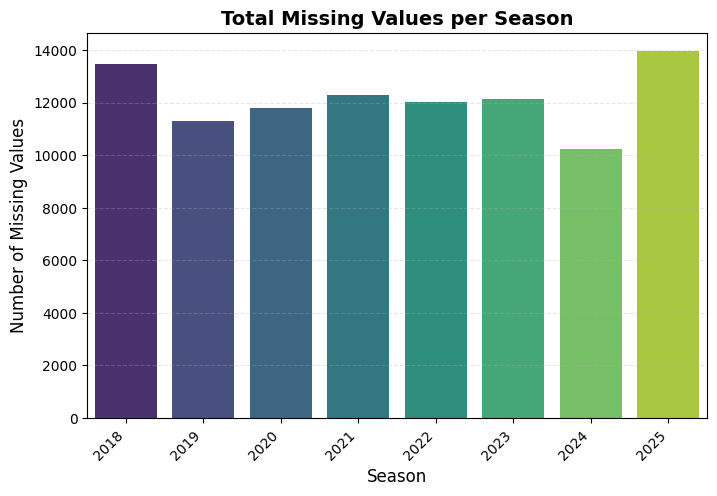

In [8]:
fig, ax1 = plt.subplots(figsize=(8,5))
bars1 = sns.barplot(x='season', y='missing_count', data=missing_by_season, palette="viridis", ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title("Total Missing Values per Season", fontsize=14, fontweight='bold')
ax1.set_xlabel("Season", fontsize=12)
ax1.set_ylabel("Number of Missing Values", fontsize=12)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
plt.savefig(f'{SAVE_PATH}/total_missing_values_per_season.png', dpi=300, bbox_inches='tight')

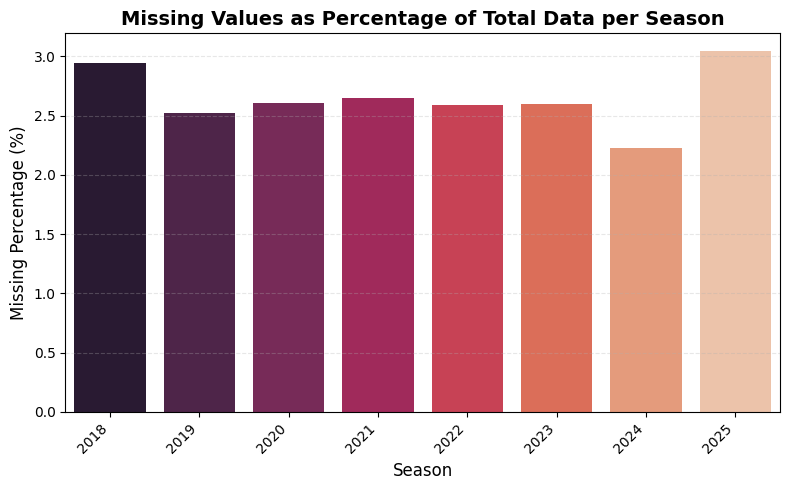

In [9]:
fig, ax2 = plt.subplots(figsize=(8,5))
# Plot 2: Missing percentages
bars2 = sns.barplot(x='season', y='missing_percentage', data=missing_by_season, 
                    palette='rocket', ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_title("Missing Values as Percentage of Total Data per Season", fontsize=14, fontweight='bold')
ax2.set_xlabel("Season", fontsize=12)
ax2.set_ylabel("Missing Percentage (%)", fontsize=12)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(f'{SAVE_PATH}/missing_percentage_per_season.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
print(f"\nMissing Data Summary:")
print(f"Total seasons: {len(missing_by_season)}")
print(f"Average missing per season: {missing_by_season['missing_count'].mean():,.0f}")
print(f"Season with most missing: {missing_by_season.loc[missing_by_season['missing_count'].idxmax(), 'season']} ({missing_by_season['missing_count'].max():,})")
print(f"Season with least missing: {missing_by_season.loc[missing_by_season['missing_count'].idxmin(), 'season']} ({missing_by_season['missing_count'].min():,})")


Missing Data Summary:
Total seasons: 8
Average missing per season: 12,144
Season with most missing: 2025 (13,951)
Season with least missing: 2024 (10,237)


## Missing values vs. Columns

In [11]:
missing_value_col = pd.DataFrame(df.isna().sum(), columns=['missing_count'])
missing_value_col.sort_values('missing_count', ascending=False, inplace=True)

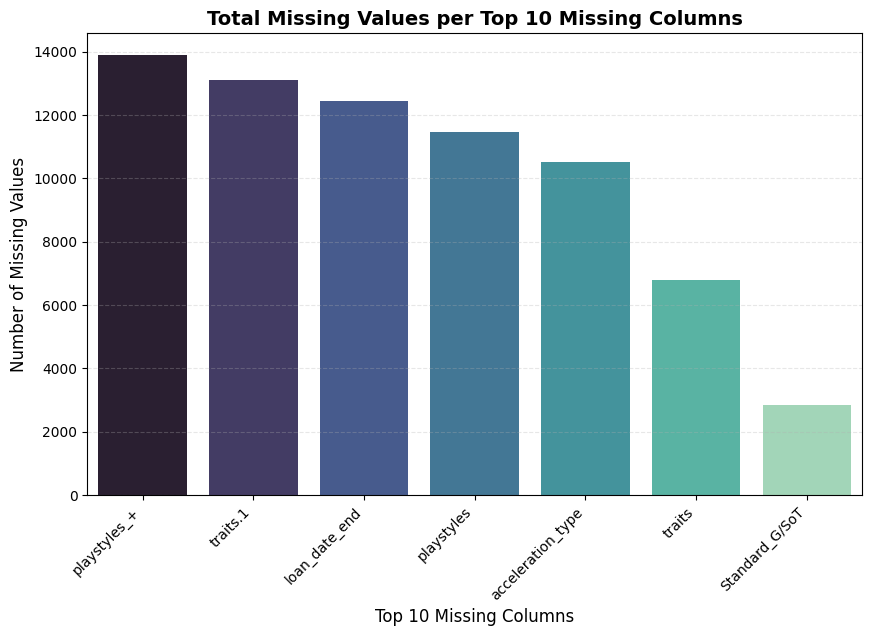

In [12]:
missing_value_col = missing_value_col[missing_value_col['missing_count'] > df.shape[0] * 0.2].head(10)

fig, ax3 = plt.subplots(figsize=(10,6))
bars3 = sns.barplot(x=missing_value_col.index, y='missing_count', data=missing_value_col, palette="mako", ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
ax3.set_title("Total Missing Values per Top 10 Missing Columns", fontsize=14, fontweight='bold')
ax3.set_xlabel("Top 10 Missing Columns", fontsize=12)
ax3.set_ylabel("Number of Missing Values", fontsize=12)
ax3.grid(axis='y', alpha=0.3, linestyle='--')
plt.savefig(f'{SAVE_PATH}/top_10_missing_columns.png', dpi=300, bbox_inches='tight')

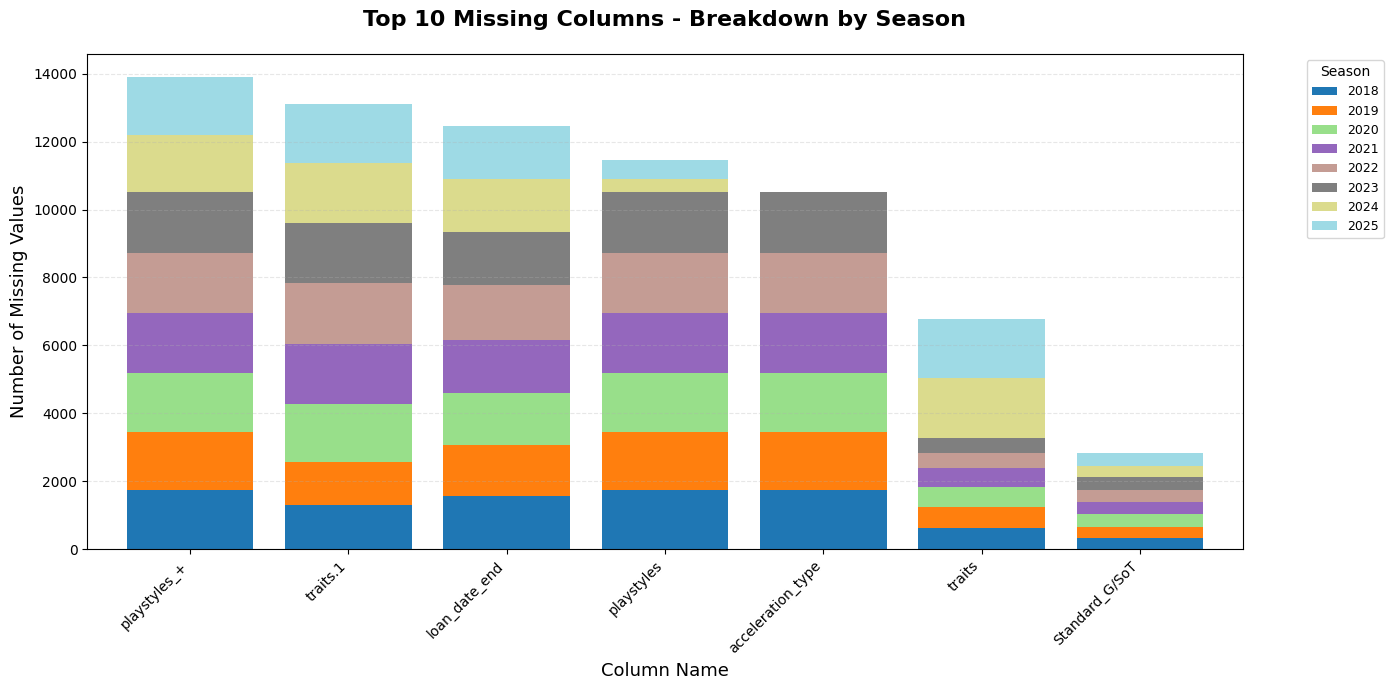

In [13]:
top_missing_cols = missing_value_col.head(10).index.tolist()

# Create a dataframe showing missing values per season for each top column
missing_by_col_season = pd.DataFrame()

for col in top_missing_cols:
    season_missing = []
    for season in sorted(df['season'].unique()):
        season_df = df[df['season'] == season]
        missing_count = season_df[col].isna().sum()
        season_missing.append(missing_count)

    missing_by_col_season[col] = season_missing

missing_by_col_season.index = sorted(df['season'].unique())

# Transpose so columns are on x-ax4is
missing_by_col_season_t = missing_by_col_season.T

# Create stacked bar chart
fig, ax4 = plt.subplots(figsize=(14, 7))

# Plot stacked bars with seasons as different colors
missing_by_col_season_t.plot(
    kind='bar', 
    stacked=True, 
    ax=ax4, 
    colormap='tab20',
    width=0.8
)

ax4.set_title("Top 10 Missing Columns - Breakdown by Season", fontsize=16, fontweight='bold', pad=20)
ax4.set_xlabel("Column Name", fontsize=13)
ax4.set_ylabel("Number of Missing Values", fontsize=13)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
ax4.grid(axis='y', alpha=0.3, linestyle='--')
ax4.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=9)

plt.tight_layout()
plt.savefig(f'{SAVE_PATH}/top_10_missing_columns_breakdown_by_season.png', dpi=300, bbox_inches='tight')
plt.show()

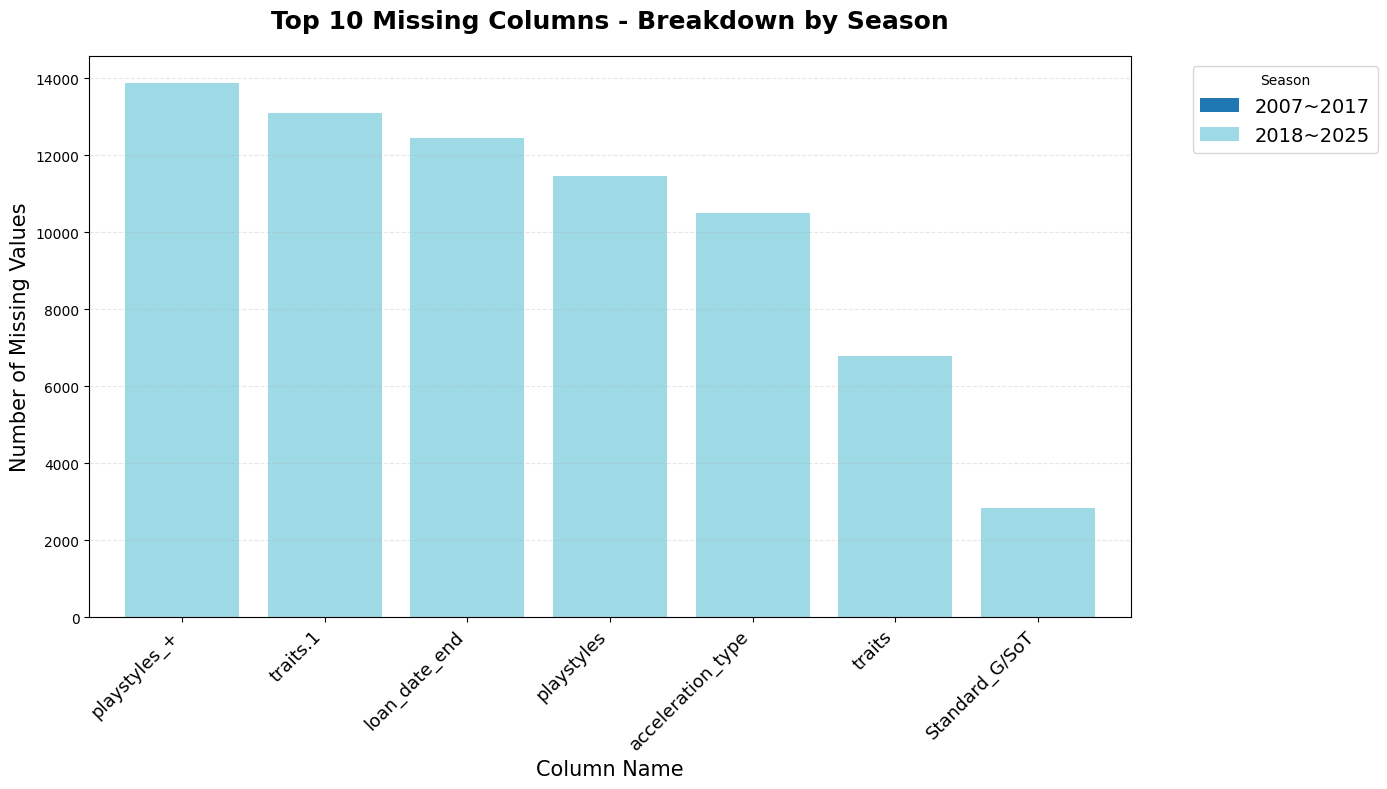

In [14]:
# Aggregate seasons into two groups: 2007-2017 and 2018-2025
missing_two_groups = missing_by_col_season_t.copy()
missing_two_groups["2007~2017"] = missing_two_groups.loc[:, 2007:2017].sum(axis=1)
missing_two_groups["2018~2025"] = missing_two_groups.loc[:, 2018:2025].sum(axis=1)
missing_two_groups = missing_two_groups[["2007~2017", "2018~2025"]]

# Create stacked bar chart
fig, ax4 = plt.subplots(figsize=(14, 8))

# Plot stacked bars with seasons as different colors
missing_two_groups.plot(
    kind='bar', 
    stacked=True, 
    ax=ax4, 
    colormap='tab20',
    width=0.8
)

ax4.set_title("Top 10 Missing Columns - Breakdown by Season", fontsize=18, fontweight='bold', pad=20)
ax4.set_xlabel("Column Name", fontsize=15)
ax4.set_ylabel("Number of Missing Values", fontsize=15)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right', fontdict={'fontsize':13})
ax4.grid(axis='y', alpha=0.3, linestyle='--')
ax4.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=14)

plt.tight_layout()
plt.savefig(f'{SAVE_PATH}/top_10_missing_columns_grouped_periods.png', dpi=300, bbox_inches='tight')
plt.show()

## Missing values before & after 2017

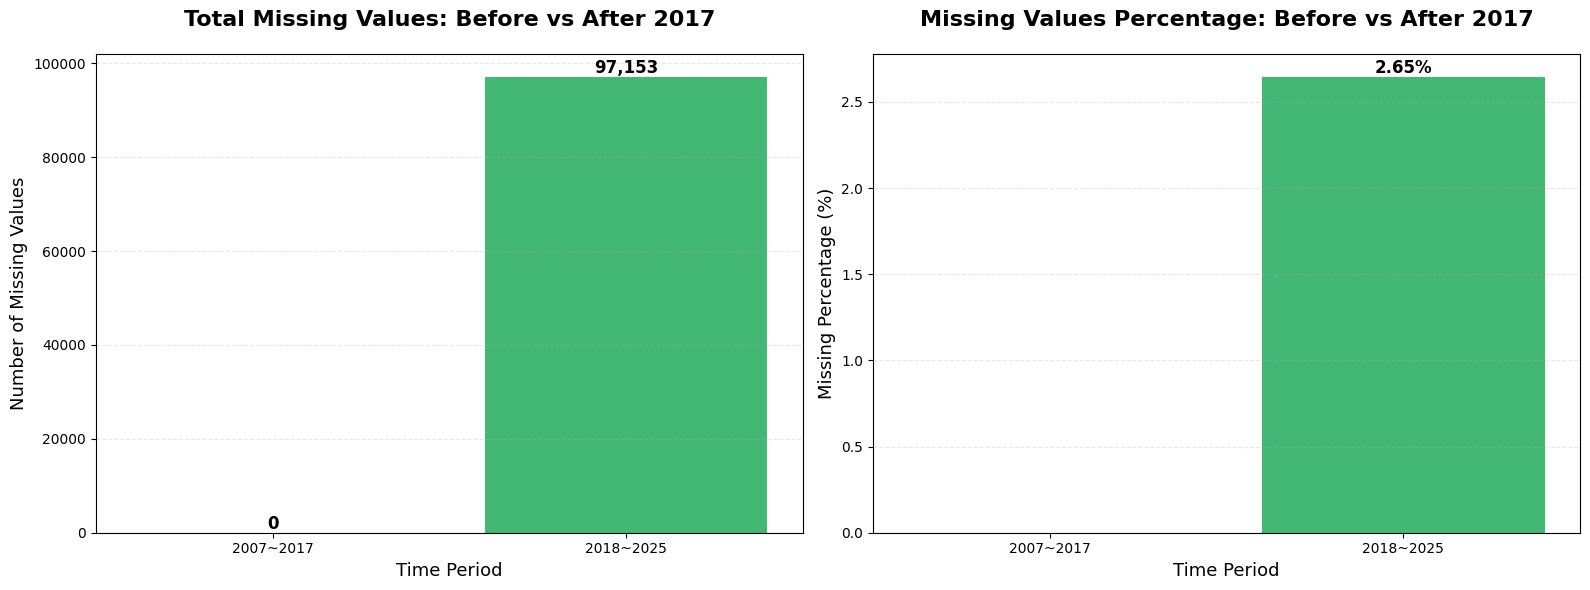

In [15]:
# Calculate total missing values for two time periods
df_before = df[df['season'] <= 2017].isna().sum().sum()
df_after = df[df['season'] >= 2018].isna().sum().sum()

# Calculate percentage reduction
total_before_cells = df[df['season'] <= 2017].shape[0] * df[df['season'] <= 2017].shape[1]
total_after_cells = df[df['season'] >= 2018].shape[0] * df[df['season'] >= 2018].shape[1]
pct_before = (df_before / total_before_cells) * 100
pct_after = (df_after / total_after_cells) * 100

# Create comparison data
comparison_data = pd.DataFrame({
    'Period': ['2007~2017', '2018~2025'],
    'Missing_Count': [df_before, df_after],
    'Missing_Percentage': [pct_before, pct_after]
})

# Create figure with two subplots
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Absolute counts
bars5 = sns.barplot(x='Period', y='Missing_Count', data=comparison_data, 
                    palette=['#e74c3c', '#2ecc71'], ax=ax5)
ax5.set_title("Total Missing Values: Before vs After 2017", fontsize=16, fontweight='bold', pad=20)
ax5.set_xlabel("Time Period", fontsize=13)
ax5.set_ylabel("Number of Missing Values", fontsize=13)
ax5.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, bar in enumerate(bars5.patches):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Plot 2: Percentage comparison
bars6 = sns.barplot(x='Period', y='Missing_Percentage', data=comparison_data,
                    palette=['#e74c3c', '#2ecc71'], ax=ax6)
ax6.set_title("Missing Values Percentage: Before vs After 2017", fontsize=16, fontweight='bold', pad=20)
ax6.set_xlabel("Time Period", fontsize=13)
ax6.set_ylabel("Missing Percentage (%)", fontsize=13)
ax6.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, bar in enumerate(bars6.patches):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{SAVE_PATH}/missing_values_before_after_2017.png', dpi=300, bbox_inches='tight')
plt.show()



## Analysis on Missing values

From this graph, we can observe that the top 10 missing columns are those that cannot be directly measured easily. For example ```Expected_npxG/SH``` actually requires a complex model to estimate, so it is understandable that the columns for the complex ones are relatively high. Also, from the seasons graph, we can also see that missing values are more prevalent in the earlier seasons (2007 ~ 2017), whereas in the later seasons, the Nan values decrease significantly. From these two observations, we can conclude that as time progressed, researchers were able to found more reliable and complex data, contributing to the decrease in missing values over time. 

Also, the last visualization shows the clear division before and after 2017. The sum of missing values between 2007 to 2017 is the majority of the total missing values, while the sum of missing values from 2018 and until now is significantly lower. This further supports our conclusion that as time progressed, the amount of missing values decreased due to advancements in data collection and modeling techniques.